# NATURAL DISASTERS DATA ANALYSIS

In [1]:
import pandas as pd # Importing pandas library
df = pd.read_csv("natural_disasters.csv") # importing the dataset

In [2]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss_in_Million_$,Buildings collapsed,probability
0,1,Wildfire,Brazil,6.267393,1999.0,3.0,455,NaN,NaN
1,2,Hurricane,Indonesia,6.649358,2019.0,0.0,873,NaN,NaN
2,3,Tornado,China,9.724366,2011.0,23.0,1058,NaN,NaN
3,4,Flood,India,1.702505,2005.0,5.0,231,NaN,NaN
4,5,Flood,Brazil,7.917748,2010.0,28.0,966,NaN,NaN


In [3]:
df.shape

(10009, 9)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Disaster_ID                 10009 non-null  int64  
 1   Disaster_Type               10009 non-null  str    
 2   Location                    10009 non-null  str    
 3   Magnitude                   10009 non-null  float64
 4   Date                        10007 non-null  float64
 5   Fatalities                  10008 non-null  float64
 6   Economic_Loss_in_Million_$  10009 non-null  int64  
 7   Buildings collapsed         0 non-null      float64
 8   probability                 0 non-null      float64
dtypes: float64(5), int64(2), str(2)
memory usage: 703.9 KB


In [5]:
df.describe()

,Disaster_ID,Magnitude,Date,Fatalities,Economic_Loss_in_Million_$,Buildings collapsed,probability
count,10009.000000,10009.000000,10007.000000,10008.000000,10009.000000,0.0,0.0
mean,5004.997902,5.218205,2004.571600,5.257394,713.410730,NaN,NaN
std,2889.490125,2.567631,8.658145,10.447377,514.468762,NaN,NaN
min,1.000000,0.710736,1990.000000,0.000000,32.000000,NaN,NaN
25%,2503.000000,2.993240,1997.000000,0.000000,334.000000,NaN,NaN
50%,5005.000000,5.142685,2004.000000,1.000000,590.000000,NaN,NaN
75%,7507.000000,7.303426,2012.000000,2.000000,946.000000,NaN,NaN
max,10006.000000,9.999671,2019.000000,40.000000,3895.000000,NaN,NaN


In [6]:
df = df[["Disaster_ID","Disaster_Type","Location","Magnitude","Date",	"Fatalities","Economic_Loss_in_Million_$"]]

In [7]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss_in_Million_$
0,1,Wildfire,Brazil,6.267393,1999.0,3.0,455
1,2,Hurricane,Indonesia,6.649358,2019.0,0.0,873
2,3,Tornado,China,9.724366,2011.0,23.0,1058
3,4,Flood,India,1.702505,2005.0,5.0,231
4,5,Flood,Brazil,7.917748,2010.0,28.0,966


In [8]:
df.groupby("Disaster_Type")["Fatalities"].sum().sort_values(ascending = False)

Disaster_Type
Tornado       13175.0
Flood         13043.0
Wildfire      12347.0
Hurricane     11754.0
Earthquake     2297.0
cyclone           0.0
Name: Fatalities, dtype: float64

In [9]:
df.groupby("Disaster_Type")["Economic_Loss_in_Million_$"].sum().sort_values(ascending = False)

Disaster_Type
Hurricane     1985214
Earthquake    1599850
Flood         1483237
Wildfire      1174649
Tornado        896496
cyclone          1082
Name: Economic_Loss_in_Million_$, dtype: int64

In [11]:
import matplotlib.pyplot as plt
y = df.groupby("Disaster_Type")["Fatalities"].sum()

In [12]:
y.info()

<class 'pandas.Series'>
Index: 6 entries, Earthquake to cyclone
Series name: Fatalities
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 96.0+ bytes


Text(0.5, 1.0, 'Total Fatalities by disaster Type')

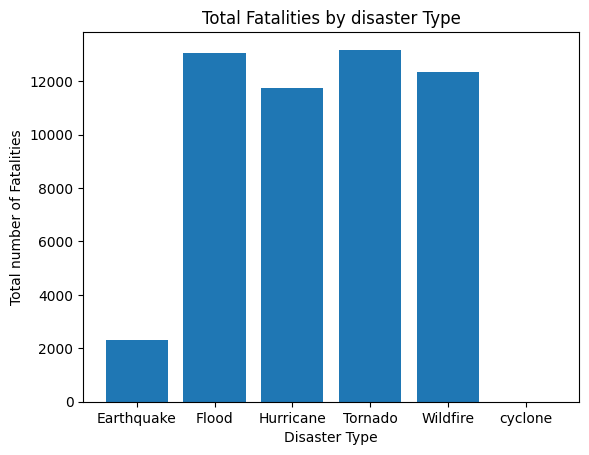

In [16]:
plt.bar(y.index,y.values)
plt.xlabel("Disaster Type")
plt.ylabel("Total number of Fatalities")

plt.title("Total Fatalities by disaster Type")

Text(0.5, 1.0, 'Total economic loss by disaster Type')

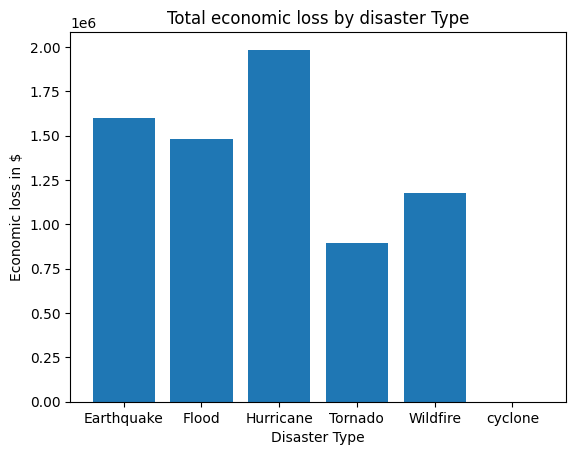

In [20]:
x = df.groupby("Disaster_Type")["Economic_Loss_in_Million_$"].sum()

plt.bar(x.index,x.values)
plt.xlabel("Disaster Type")
plt.ylabel("Economic loss in $")

plt.title("Total economic loss by disaster Type")

In [29]:
country_groups_economy = df.groupby("Location")["Economic_Loss_in_Million_$"].sum()

country_groups_economy

Location
Brazil        960116
China        1472156
India        1136231
Indonesia     639368
Japan        1023769
USA          1908888
Name: Economic_Loss_in_Million_$, dtype: int64

In [26]:
country_groups_fatalities = df.groupby("Location")["Fatalities"].sum().sort_values(ascending=False)

country_groups_fatalities

Location
Indonesia    9996.0
India        9581.0
Brazil       9107.0
Japan        8331.0
China        7879.0
USA          7722.0
Name: Fatalities, dtype: float64

Text(0.5, 1.0, 'Total economy loss by country')

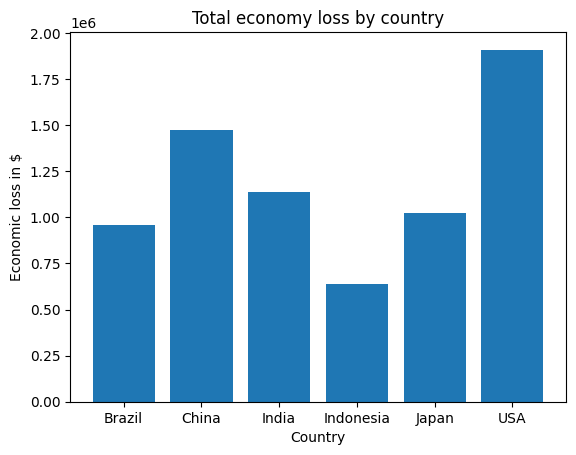

In [30]:
plt.bar(country_groups_economy.index,country_groups_economy.values)
plt.xlabel("Country")
plt.ylabel("Economic loss in $")

plt.title("Total economy loss by country")

Text(0.5, 1.0, 'Total Fatalities by country')

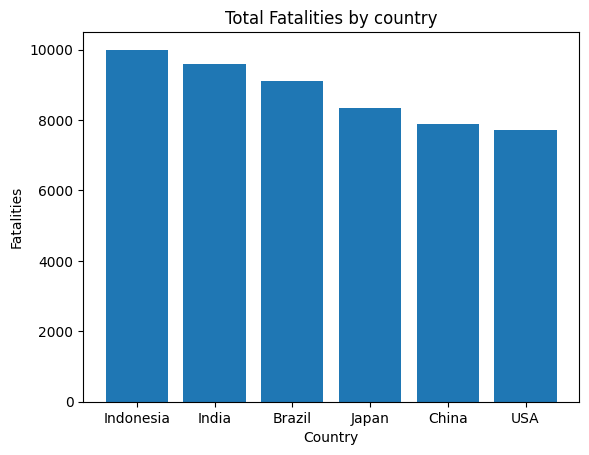

In [32]:
plt.bar(country_groups_fatalities.index,country_groups_fatalities.values)
plt.xlabel("Country")
plt.ylabel("Fatalities")

plt.title("Total Fatalities by country")

Features = disaster type, location, magnitude and economy loss

label = fatalities

split the data into 80-20
80 for train
20 for test



# Encoding

In [69]:
features_b = df[["Disaster_Type","Location","Magnitude","Economic_Loss_in_Million_$","Fatalities"]]

features_b.shape

features = features_b.dropna(subset=['Fatalities'])

features

f = features["Fatalities"]



<class 'pandas.Series'>
Index: 10008 entries, 0 to 10008
Series name: Fatalities
Non-Null Count  Dtype  
--------------  -----  
10008 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


In [70]:
f

0         3.0
1         0.0
2        23.0
3         5.0
4        28.0
         ... 
10004     1.0
10005     1.0
10006     1.0
10007     1.0
10008     1.0
Name: Fatalities, Length: 10008, dtype: float64

In [36]:
"""from sklearn.model_selection import train_test_split
features_train, features_test, f_train, f_test = train_test_split(features, f, test_size=0.2, random_state=42) """

In [71]:
for a in (features_train, features_test, f_train, f_test):
    print (a.shape)

(8007, 4)
(2002, 4)
(8007,)
(2002,)


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

non_numerical_cols = ['Disaster_Type', 'Location']

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), non_numerical_cols)],
                               remainder='passthrough') # This specifies that all other columns should be kept

features_encoded = transformer.fit_transform(features)

In [73]:
features_encoded.shape

(10008, 14)

In [45]:
#transformer.fit(features)
#nc = transformer.get_feature_names_out()
#nc

array(['encoder__Disaster_Type_Earthquake',
       'encoder__Disaster_Type_Flood', 'encoder__Disaster_Type_Hurricane',
       'encoder__Disaster_Type_Tornado',
       'encoder__Disaster_Type_Wildfire',
       'encoder__Disaster_Type_cyclone', 'encoder__Location_Brazil',
       'encoder__Location_China', 'encoder__Location_India',
       'encoder__Location_Indonesia', 'encoder__Location_Japan',
       'encoder__Location_USA', 'remainder__Magnitude',
       'remainder__Economic_Loss_in_Million_$'], dtype=object)

In [74]:
features_train_encoded, features_test_encoded, f_train, f_test = train_test_split(features_encoded, f, test_size=0.2, random_state=42)

In [75]:
features_train_encoded.shape

(8006, 14)

# Training

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(features_train_encoded, f_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Prediction

In [88]:
y_train_hat = model.predict(features_train_encoded) # too easy --> vedi
y_train_hat

array([-1.92289606e-13,  3.00000000e+00, -9.48562041e-13, ...,
        2.00000000e+00,  2.00000000e+00, -6.01188938e-13], shape=(8006,))

In [78]:
f_train[:5]

8291    0.0
7866    3.0
1095    0.0
4328    2.0
8965    1.0
Name: Fatalities, dtype: float64

In [85]:
y_test_hat = model.predict(features_test_encoded) # WE PASS X_test_encoded, now we are in the test set
y_test_hat[:5]

np.float64(31.00000000000067)

In [81]:
f_test[:5]

3574     0.0
9056    25.0
568      1.0
3160    31.0
1558     0.0
Name: Fatalities, dtype: float64

# Visualization

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8006,) and arg 1 with shape (5,).

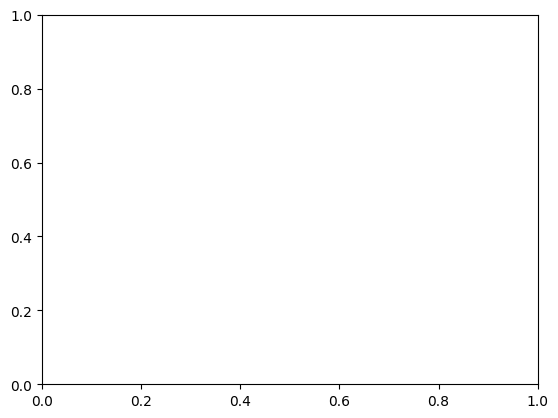

In [87]:
import matplotlib.pyplot as plt

plt.scatter(f_train, y_train_hat) # to see how this points are located
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Train data")

plt.show()